# Library


In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime
import pyexasol

In [2]:
# 소수점 옵션
pd.options.display.float_format = '{:.5f}'.format
# pd.reset_option('display.float_format')

# server

In [3]:
# # insider db
# wb = pyexasol.connect(dsn='172.29.135.35/F99FAB2444F86051A9A467F6313FAAB48AF7C4760663430958E3B89A9DC53361:8563', user='sys', password='exasol', compression=True, schema='VSYSD')
# exasol db
ws = pyexasol.connect(dsn='dev.openankus.org:8563', user='sys', password='djslzja', compression=True, schema='VSYS')
wb = pyexasol.connect(dsn='dev.openankus.org:8563', user='sys', password='djslzja', compression=True, schema='VSYSD')
we = pyexasol.connect(dsn='dev.openankus.org:8563', user='sys', password='djslzja', compression=True, schema='vsyse')
wbt = pyexasol.connect(dsn='dev.openankus.org:8563', user='sys', password='djslzja', compression=True, schema='wbt')

# fold path

In [4]:
drive = 'D'
ods_fold = f'{drive}:/data/big2/ODS'
big2_fold = f'{drive}:/data/big2'
an3_fold = f'{drive}:/data/big2/BD3/an'
raw3_fold = f'{drive}:/data/big2/BD3/raw'
df3_fold = f'{drive}:/data/big2/BD3/df'

# Load
- 등록&제원 -> 4, 5등급

## 등록정보(STD_CEG_CAR_MIG) 4, 5등급만

In [191]:
# 20.2s
car = wb.export_to_pandas("SELECT VIN, BSPL_STDG_CD, VHCL_ERSR_YN, MANP_MNG_NO, EXHST_GAS_GRD_CD, YRIDNW, VHCTY_CD, PURPS_CD2, FRST_REG_YMD, VHCL_FBCTN_YMD, VHRNO FROM STD_CEG_CAR_MIG WHERE EXHST_GAS_GRD_CD = 'A0504' OR EXHST_GAS_GRD_CD = 'A05T4' OR EXHST_GAS_GRD_CD = 'A0505' OR EXHST_GAS_GRD_CD = 'A05T5';")

C:\Users\kbjung\AppData\Roaming\Python\Python39\site-packages\pyexasol\callback.py:42: DtypeWarning: Columns (3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  return pandas.read_csv(pipe, skip_blank_lines=False, **kwargs)


In [192]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277460 entries, 0 to 4277459
Data columns (total 11 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   VIN               object
 1   BSPL_STDG_CD      int64 
 2   VHCL_ERSR_YN      object
 3   MANP_MNG_NO       object
 4   EXHST_GAS_GRD_CD  object
 5   YRIDNW            int64 
 6   VHCTY_CD          object
 7   PURPS_CD2         object
 8   FRST_REG_YMD      int64 
 9   VHCL_FBCTN_YMD    object
 10  VHRNO             object
dtypes: int64(3), object(8)
memory usage: 359.0+ MB


In [193]:
car_ch_col = {
    'VIN':'차대번호', 
    'BSPL_STDG_CD':'법정동코드', 
    'VHCL_ERSR_YN':'차량말소YN',
    'MANP_MNG_NO':'제원관리번호', 
    'EXHST_GAS_GRD_CD':'배출가스등급', 
    'YRIDNW':'차량연식', 
    'VHCTY_CD':'차종', 
    'PURPS_CD2':'용도', 
    'FRST_REG_YMD':'최초등록일자',
    'VHCL_FBCTN_YMD':'제작일자',
    'VHRNO':'차량번호',
}

In [194]:
carr = car.rename(columns=car_ch_col)

In [195]:
carr.columns

Index(['차대번호', '법정동코드', '차량말소YN', '제원관리번호', '배출가스등급', '차량연식', '차종', '용도',
       '최초등록일자', '제작일자', '차량번호'],
      dtype='object')

## 제원정보(STD_CEG_CAR_SRC_MIG)

In [70]:
# 3.8s
src = wb.export_to_pandas("SELECT MANP_MNG_NO, FUEL_CD, VHCTY_TY_CD2 FROM STD_CEG_CAR_SRC_MIG;")

In [71]:
src_ch_col = {
    'MANP_MNG_NO':'제원관리번호', 
    'FUEL_CD':'연료',
    'VHCTY_TY_CD2':'차종유형', 
}

In [72]:
srcr = src.rename(columns=src_ch_col)
srcr.columns

Index(['제원관리번호', '연료', '차종유형'], dtype='object')

## 정기검사(STD_TB_JGT_HIS)

In [13]:
# 3m 34.9s
# jgt = wb.export_to_pandas("SELECT VIN, FDRM_INSP_INSP_MTHD_CD, FDRM_INSP_KND_CD, FDRM_INSP_JGMT, FDRM_NLOD_SMO_MSTVL1, FDRM_NLOD_SMO_MSTVL2, FDRM_NLOD_SMO_MSTVL3, FDRM_NLOD_SMO_JT_YN1, FDRM_INSP_YMD, FDRM_DRVNG_DSTNC, FDRM_NLOD_SMO_PRMVL1 FROM STD_TB_JGT_HIS WHERE rownum <= 1000;") # 테스트용
jgt = wb.export_to_pandas("SELECT VIN, FDRM_INSP_INSP_MTHD_CD, FDRM_INSP_KND_CD, FDRM_INSP_JGMT, FDRM_NLOD_SMO_MSTVL1, FDRM_NLOD_SMO_MSTVL2, FDRM_NLOD_SMO_MSTVL3, FDRM_NLOD_SMO_JT_YN1, FDRM_INSP_YMD, FDRM_DRVNG_DSTNC, FDRM_NLOD_SMO_PRMVL1 FROM STD_TB_JGT_HIS;")
jgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64316863 entries, 0 to 64316862
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   VIN                     object 
 1   FDRM_INSP_INSP_MTHD_CD  object 
 2   FDRM_INSP_KND_CD        object 
 3   FDRM_INSP_JGMT          object 
 4   FDRM_NLOD_SMO_MSTVL1    float64
 5   FDRM_NLOD_SMO_MSTVL2    float64
 6   FDRM_NLOD_SMO_MSTVL3    float64
 7   FDRM_NLOD_SMO_JT_YN1    object 
 8   FDRM_INSP_YMD           int64  
 9   FDRM_DRVNG_DSTNC        float64
 10  FDRM_NLOD_SMO_PRMVL1    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 5.3+ GB


In [14]:
jgt_ch_col = {
    'VIN':'차대번호', 
    'FDRM_INSP_INSP_MTHD_CD':'검사방법', 
    'FDRM_INSP_KND_CD':'검사종류', 
    'FDRM_INSP_JGMT':'검사판정', 
    'FDRM_NLOD_SMO_MSTVL1':'무부하매연측정치1', 
    'FDRM_NLOD_SMO_MSTVL2':'무부하매연측정치2', 
    'FDRM_NLOD_SMO_MSTVL3':'무부하매연측정치3', 
    'FDRM_NLOD_SMO_JT_YN1':'무부하매연판정1', 
    'FDRM_INSP_YMD':'검사일자',
    'FDRM_DRVNG_DSTNC':'주행거리',
    'FDRM_NLOD_SMO_PRMVL1':'무부하매연허용치1', 
}

In [15]:
jgtr = jgt.rename(columns=jgt_ch_col)
jgtr.columns

Index(['차대번호', '검사방법', '검사종류', '검사판정', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3',
       '무부하매연판정1', '검사일자', '주행거리', '무부하매연허용치1'],
      dtype='object')

## 정밀검사(STD_TB_EET_HIS_ME)

In [16]:
# 6m 36.1s
# eet = wb.export_to_pandas("SELECT VIN, PRCINSP_MSRMT_MTHD_CD, PRCINSP_KND_CD, PRCINSP_JGMT, PREC_NLOD_SMO_MSTVL1, PREC_NLOD_SMO_MSTVL2, PREC_NLOD_SMO_MSTVL3, PREC_NLOD_SMO_JT_YN1, PRCINSP_YMD, PRCINSP_DRVNG_DSTNC FROM STD_TB_EET_HIS_ME WHERE rownum <= 1000;") # 테스트용
eet = wb.export_to_pandas("SELECT VIN, PRCINSP_MSRMT_MTHD_CD, PRCINSP_KND_CD, PRCINSP_JGMT, PREC_NLOD_SMO_MSTVL1, PREC_NLOD_SMO_MSTVL2, PREC_NLOD_SMO_MSTVL3, PREC_NLOD_SMO_JT_YN1, PRCINSP_YMD, PRCINSP_DRVNG_DSTNC, PREC_NLOD_SMO_PRMVL1 FROM STD_TB_EET_HIS_ME;")
eet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99608917 entries, 0 to 99608916
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VIN                    object 
 1   PRCINSP_MSRMT_MTHD_CD  object 
 2   PRCINSP_KND_CD         object 
 3   PRCINSP_JGMT           object 
 4   PREC_NLOD_SMO_MSTVL1   float64
 5   PREC_NLOD_SMO_MSTVL2   float64
 6   PREC_NLOD_SMO_MSTVL3   float64
 7   PREC_NLOD_SMO_JT_YN1   object 
 8   PRCINSP_YMD            int64  
 9   PRCINSP_DRVNG_DSTNC    float64
 10  PREC_NLOD_SMO_PRMVL1   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 8.2+ GB


In [17]:
eet.columns

Index(['VIN', 'PRCINSP_MSRMT_MTHD_CD', 'PRCINSP_KND_CD', 'PRCINSP_JGMT',
       'PREC_NLOD_SMO_MSTVL1', 'PREC_NLOD_SMO_MSTVL2', 'PREC_NLOD_SMO_MSTVL3',
       'PREC_NLOD_SMO_JT_YN1', 'PRCINSP_YMD', 'PRCINSP_DRVNG_DSTNC',
       'PREC_NLOD_SMO_PRMVL1'],
      dtype='object')

In [18]:
eet_ch_col = {
    'VIN':'차대번호', 
    'PRCINSP_MSRMT_MTHD_CD':'검사방법', 
    'PRCINSP_KND_CD':'검사종류', 
    'PRCINSP_JGMT':'검사판정', 
    'PREC_NLOD_SMO_MSTVL1':'무부하매연측정치1', 
    'PREC_NLOD_SMO_MSTVL2':'무부하매연측정치2', 
    'PREC_NLOD_SMO_MSTVL3':'무부하매연측정치3', 
    'PREC_NLOD_SMO_JT_YN1':'무부하매연판정1', 
    'PRCINSP_YMD':'검사일자',
    'PRCINSP_DRVNG_DSTNC':'주행거리', 
    'PREC_NLOD_SMO_PRMVL1':'무부하매연허용치1', 
}

In [19]:
eetr = eet.rename(columns=eet_ch_col)
eetr.columns

Index(['차대번호', '검사방법', '검사종류', '검사판정', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3',
       '무부하매연판정1', '검사일자', '주행거리', '무부하매연허용치1'],
      dtype='object')

## 법정동코드(STD_BJCD_INFO)

In [20]:
# 1.3s
code = wb.export_to_pandas("SELECT STDG_CD, STDG_CTPV_NM, STDG_SGG_NM FROM STD_BJCD_INFO;")
code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46333 entries, 0 to 46332
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STDG_CD       46333 non-null  int64 
 1   STDG_CTPV_NM  46333 non-null  object
 2   STDG_SGG_NM   46310 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [21]:
code.columns

Index(['STDG_CD', 'STDG_CTPV_NM', 'STDG_SGG_NM'], dtype='object')

In [22]:
code_ch_col = {
    'STDG_CD':'법정동코드', 
    'STDG_CTPV_NM':'시도', 
    'STDG_SGG_NM':'시군구',  
}

In [23]:
coder = code.rename(columns=code_ch_col)
coder.columns

Index(['법정동코드', '시도', '시군구'], dtype='object')

## 저감장치 부착이력(STD_DLM_TB_ERP_ATT_HIS)

In [24]:
# 3.0s
att = wb.export_to_pandas("SELECT VIN, RDCDVC_SE_CD FROM STD_DLM_TB_ERP_ATT_HIS;")
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010946 entries, 0 to 1010945
Data columns (total 2 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   VIN           1010946 non-null  object
 1   RDCDVC_SE_CD  1010946 non-null  object
dtypes: object(2)
memory usage: 15.4+ MB


In [25]:
att_ch_col = {
    'VIN':'차대번호', 
    'RDCDVC_SE_CD':'저감장치구분', 
}

In [26]:
attr = att.rename(columns=att_ch_col)
attr.columns

Index(['차대번호', '저감장치구분'], dtype='object')

## 운행제한 건수 데이터

In [27]:
# 0.8s
name = '차대번호별_적발(2023.06.13)'
file_name = f'{name}.csv'
lmt = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
lmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731507 entries, 0 to 731506
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   VIN     731507 non-null  object 
 1   계절제_1차  37861 non-null   float64
 2   계절제_2차  54788 non-null   float64
 3   계절제_3차  68278 non-null   float64
 4   비상시     94084 non-null   float64
 5   상시      84185 non-null   float64
 6   계절제_4차  29307 non-null   float64
dtypes: float64(6), object(1)
memory usage: 39.1+ MB


In [28]:
lmt = lmt.rename(columns={'VIN':'차대번호'})

In [29]:
lmt.columns

Index(['차대번호', '계절제_1차', '계절제_2차', '계절제_3차', '비상시', '상시', '계절제_4차'], dtype='object')

In [30]:
lmt['운행제한건수'] = lmt[['계절제_1차', '계절제_2차', '계절제_3차', '비상시', '상시', '계절제_4차']].sum(axis=1)
lmt.head()

,차대번호,계절제_1차,계절제_2차,계절제_3차,비상시,상시,계절제_4차,운행제한건수
0,KPBFA2AD14P100772,1.00000,NaN,NaN,1.00000,NaN,NaN,2.00000
1,KMJWWH7JP5U656738,4.00000,2.00000,25.00000,3.00000,NaN,1.00000,35.00000
2,KNAJC52136A532787,2.00000,NaN,NaN,1.00000,NaN,NaN,3.00000
3,KMHSH81WP6U081899,4.00000,NaN,NaN,1.00000,NaN,NaN,5.00000
4,KNAJE55186K143510,1.00000,NaN,NaN,1.00000,NaN,NaN,2.00000


## 4등급 result(for DPF유무)

In [31]:
rs = pd.read_csv(os.path.join(raw3_fold, '4등급_차량_리스트_양식_result_최종(전체)(2023.07.03).csv'), usecols=['차대번호', 'DPF유무_수정'])
rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502235 entries, 0 to 1502234
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   차대번호      1502235 non-null  object
 1   DPF유무_수정  1153813 non-null  object
dtypes: object(2)
memory usage: 22.9+ MB


C:\Users\kbjung\AppData\Local\Temp\ipykernel_12540\3926308010.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  rs = pd.read_csv(os.path.join(raw3_fold, '4등급_차량_리스트_양식_result_최종(전체)(2023.07.03).csv'), usecols=['차대번호', 'DPF유무_수정'])


## STD_KOSIS

In [151]:
kosis = we.export_to_pandas("SELECT CTPV, SGG, VHCTY_CD, DY_AVRG_DRVNG_DSTNC FROM STD_KOSIS;")
kosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CTPV                 1230 non-null   object 
 1   SGG                  1230 non-null   object 
 2   VHCTY_CD             1230 non-null   object 
 3   DY_AVRG_DRVNG_DSTNC  1230 non-null   float64
dtypes: float64(1), object(3)
memory usage: 38.6+ KB


In [152]:
kosis_ch_col = {
    'CTPV':'시도', 
    'SGG':'시군구', 
    'VHCTY_CD':'차종', 
    'DY_AVRG_DRVNG_DSTNC':'일일평균주행거리', 
}

In [153]:
kosisr = kosis.rename(columns=kosis_ch_col)
kosisr.columns

Index(['시도', '시군구', '차종', '일일평균주행거리'], dtype='object')

In [154]:
kosisr.head()

,시도,시군구,차종,일일평균주행거리
0,서울특별시,소계,합계,36.60000
1,서울특별시,소계,승용,33.90000
2,서울특별시,소계,승합,48.30000
3,서울특별시,소계,화물,54.40000
4,서울특별시,소계,특수,49.30000


# 전처리

## 중복 차대번호 제거

In [197]:
carr.shape, len(carr['차대번호'].unique())

((4277460, 11), 4277361)

In [198]:
carr = carr.sort_values('최초등록일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
carr.shape

(4277361, 11)

## 배출가스등급 코드 변환

In [199]:
grd_dict = {
    'A0501':'1', 
    'A0502':'2', 
    'A0503':'3', 
    'A0504':'4', 
    'A0505':'5', 
    'A05T2':'2',
    'A05T3':'3', 
    'A05T4':'4', 
    'A05T5':'5', 
    'A05X':'X', 
}
carr['배출가스등급'] = carr['배출가스등급'].replace(grd_dict)
carr['배출가스등급'].unique()

array(['5', '4'], dtype=object)

## 차종 코드 변환

In [200]:
cd_dict = {
    'A31M':'이륜', 
    'A31P':'승용', 
    'A31S':'특수', 
    'A31T':'화물', 
    'A31V':'승합'
}
carr['차종'] = carr['차종'].replace(cd_dict)
carr['차종'].unique()

array(['화물', '승합', '승용', '특수', nan], dtype=object)

## 용도 코드 변환

In [201]:
purps_dict = {
    'A08P':'개인용', 
    'A08B':'영업용', 
    'A08O':'관용',
}
carr['용도'] = carr['용도'].replace(purps_dict)
carr['용도'].unique()

array(['개인용', '영업용', '관용'], dtype=object)

## 등록정보 말소 제거

In [202]:
carm = carr[carr['차량말소YN'] == 'N'].reset_index(drop=True)
carm.shape

(2678048, 11)

## 연료 코드 변환

In [203]:
fuel_dict = {
    'A90GS':'휘발유', 
    'A91DS':'경유',
    'A92LP':'LPG(액화석유가스)', 
    'A90GH':'휘발유 하이브리드', 
    'A93EV':'전기', 
    'A91DH':'경유 하이브리드', 
    'A92CN':'CNG(압축천연가스)', 
    'A93HD':'수소', 
    'A92LH':'LPG 하이브리드', 
    'A94OT':'기타연료', 
    'A92CH':'CNG 하이브리드',
    'A90AC':'알코올', 
    'A93SH':'태양열', 
    'A91KS':'등유', 
    'A92LN':'LNG(액화천연가스)', 
    'A90PH':'플러그인 하이브리드', 
}
srcr['연료'] = srcr['연료'].replace(fuel_dict)
srcr['연료'].unique()

array(['경유', '휘발유', 'CNG(압축천연가스)', nan, 'LPG(액화석유가스)', '기타연료',
       '휘발유 하이브리드', '전기', '알코올', '태양열', '경유 하이브리드', '등유', 'CNG 하이브리드',
       'LPG 하이브리드', '수소', 'LNG(액화천연가스)'], dtype=object)

## 차종유형 코드 변환

In [204]:
ty_dict = {
    'A30C':'경형', 
    'A30L':'대형', 
    'A30M':'중형', 
    'A30S':'소형',
}
srcr['차종유형'] = srcr['차종유형'].replace(ty_dict)
srcr['차종유형'].unique()

array(['대형', '소형', '중형', '경형', nan], dtype=object)

## 저감장치구분 코드 변환

In [205]:
# 4m 14.3s
attr['저감장치구분'].unique()

array(['1종', '3종', '엔진개조', '2종', '엔진교체', '1종+SCR', '삼원촉매'], dtype=object)

In [206]:
# 27.5s
rdcdvc_dict = {
    'A1001':'1종', 
    'A1002':'2종', 
    'A1003':'3종', 
    'A1004':'1종+SCR', 
    'A1005':'엔진개조', 
    'A1006':'엔진교체',
    'A1007':'삼원촉매',
}
attr['저감장치구분'] = attr['저감장치구분'].replace(rdcdvc_dict)
attr['저감장치구분'].unique()

array(['1종', '3종', '엔진개조', '2종', '엔진교체', '1종+SCR', '삼원촉매'], dtype=object)

## 저감장치 부착 유무

In [207]:
attr.loc[(attr['저감장치구분'] == '1종') | (attr['저감장치구분'] == '1종+SCR'), 'DPF_YN'] = '유'

In [208]:
attr['DPF_YN'].value_counts(dropna=False)

DPF_YN
NaN    530604
유      478769
Name: count, dtype: int64

## 등록&제원 병합

In [209]:
# 0.7s
cs = carm.merge(srcr, on='제원관리번호', how='left')
cs.shape

(2678048, 13)

## 정기&정밀 병합

In [210]:
jgtr.columns

Index(['차대번호', '검사방법', '검사종류', '검사판정', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3',
       '무부하매연판정1', '검사일자', '주행거리', '무부하매연허용치1', '정기정밀'],
      dtype='object')

In [211]:
eetr.columns

Index(['차대번호', '검사방법', '검사종류', '검사판정', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3',
       '무부하매연판정1', '검사일자', '주행거리', '무부하매연허용치1', '정기정밀'],
      dtype='object')

In [212]:
jgtr['정기정밀'] = '정기'
eetr['정기정밀'] = '정밀'

In [213]:
# 3m 1.9s
ins = pd.concat([jgtr, eetr], ignore_index=True)
ins.shape

(163925780, 12)

### 최근 검사만 활용

In [214]:
# 4m 14.3s
insm = ins.sort_values('검사일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
insm.shape

(34114272, 12)

## 검사종류 코드 변환

In [215]:
# 27.5s
knd_dict = {
    'A21P01':'정밀검사', 
    'A1904':'정기검사', 
    'A21T06':'종합검사(경과)', 
    'A21T05':'종합검사', 
    'A21S01':'특정검사', 
    'A1902':'재검사(2부재검사)',
    'A21R02':'2부재검사(종합)', 
    'A21P02':'정밀검사(경과)', 
    'A1903':'정기(경과)검사', 
    'A21S04':'특정재검사(배출)', 
    'A21E01':'배출재검사', 
    'A21R01':'1부재검사(종합)',
    'A21C02':'구조변경검사', 
    'A21002':'관능재검사(임시)', 
    'A21S03':'특정재검사(관능)', 
    'A21S02':'특정검사(경과)', 
    'A1901':'재검사(1부재검사)', 
    'A21T02':'종합(정밀)',
    'A21E02':'배출재검사(구변)', 
    'A21T01':'종합(경과:정밀)', 
    'A21T04':'종합(정밀) 2부재검사', 
    'A21001':'관능재검사', 
    'A21T03':'종합(정밀) 1부재검사', 
    'A21TMP':'임시검사', 
}
insm['검사종류'] = insm['검사종류'].replace(knd_dict)
insm['검사종류'].unique()

array(['종합검사', '종합검사(경과)', '1부재검사(종합)', '2부재검사(종합)', '정기검사', '재검사(1부재검사)',
       '재검사(2부재검사)', '정기(경과)검사', nan, '배출재검사(구변)', '구조변경검사',
       '종합(정밀) 1부재검사', '종합(정밀) 2부재검사', '종합(정밀)', '종합(경과:정밀)', '정밀검사',
       '특정재검사(배출)', '임시검사', '배출재검사', '관능재검사', '특정재검사(관능)', '특정검사',
       '특정검사(경과)', '정밀검사(경과)', 'A21R03', 'A21R05', 'A21R06', '관능재검사(임시)',
       'A21E03'], dtype=object)

## 검사방법 코드 변환

In [216]:
# 14.9s
mth_dict = {
    'A18A':'무부하검사(TSI)', 
    'A18B':'무부하검사(급가속)', 
    'A18C':'무부하검사(정지가동)',
    'A2301':'무부하검사(급가속)', 
    'A2302':'무부하검사(정지가동)',
    'A2303':'무부하검사(TSI)', 
    'A2304':'부하검사(LUG DOWN)', 
    'A2305':'부하검사(ASM-Idling)', 
    'A2306':'부하검사(KD-147)', 
    'A2307':'부하검사(ASM2525)', 
}
insm['검사방법'] = insm['검사방법'].replace(mth_dict)
insm['검사방법'].unique()

array(['무부하검사(급가속)', '부하검사(KD-147)', '부하검사(ASM-Idling)', '부하검사(LUG DOWN)',
       '무부하검사(TSI)', '무부하검사(정지가동)', '부하검사(ASM2525)'], dtype=object)

## 등록&제원&정기&정밀 병합

In [217]:
# 2m 0.5s
csi = cs.merge(insm, on='차대번호', how='left')
csi.shape

(2678048, 24)

In [218]:
csi.columns

Index(['차대번호', '법정동코드', '차량말소YN', '제원관리번호', '배출가스등급', '차량연식', '차종', '용도',
       '최초등록일자', '제작일자', '차량번호', '연료', '차종유형', '검사방법', '검사종류', '검사판정',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연판정1', '검사일자', '주행거리',
       '무부하매연허용치1', '정기정밀'],
      dtype='object')

## 등록&제원&정기&정밀&법정동 병합

In [219]:
csi.shape

(2678048, 24)

In [220]:
csic = csi.merge(coder, on='법정동코드', how='left')
csic.shape

(2678048, 26)

In [221]:
csic['시도'].isnull().sum()

2

In [222]:
csic.loc[csic['시도'].isnull() == True, '법정동코드']

1844564    4165052000
2426532    4163055000
Name: 법정동코드, dtype: int64

In [223]:
# 주소 수정
csic.loc[csic['법정동코드'] == 4165052000, ['시도', '시군구']] = ['경기도', '포천시'] # 경기도 포천시 선단동
csic.loc[csic['법정동코드'] == 4163055000, ['시도', '시군구']] = ['경기도', '양주시'] # 경기도 양주시 회천3동

In [224]:
csic['시도'].isnull().sum()

0

## 등록&제원&정기&정밀&법정동&저감 병합

In [225]:
csic.shape

(2678048, 26)

In [226]:
attr.shape

(1009373, 3)

In [227]:
attr = attr.drop_duplicates('차대번호').reset_index(drop=True)
attr.shape

(1009373, 3)

In [228]:
csica = csic.merge(attr, on='차대번호', how='left')
csica.shape

(2678048, 28)

## 등록&제원&정기&정밀&법정동&저감&운행제한건수 병합

In [229]:
csica.shape

(2678048, 28)

In [230]:
df = csica.merge(lmt[['차대번호', '운행제한건수']], on='차대번호', how='left')
df.shape

(2678048, 29)

## 저감장치 부착 여부 result로 수정

## 4등급 result 파일 참고하여 DPF유무 수정

In [231]:
rdf = df.copy()

In [232]:
len(set(rdf['차대번호'].unique()) - set(rs['차대번호'].unique()))

1215495

In [233]:
rdf['DPF_YN'].value_counts(dropna=False)

DPF_YN
NaN    2358952
유       319096
Name: count, dtype: int64

In [234]:
rs['DPF유무_수정'].value_counts(dropna=False)

DPF유무_수정
무       879481
NaN     348400
유       261897
확인불가     12435
Name: count, dtype: int64

In [235]:
rs = rs.drop_duplicates('차대번호').reset_index(drop=True)
rs.shape

(1502213, 2)

In [236]:
rdf1 = rdf.merge(rs, on='차대번호', how='left')

In [237]:
rdf1.loc[(rdf1['DPF_YN'] == '유') | (rdf1['DPF유무_수정'] == '유'), 'DPF_YN'] = '유'
rdf1.loc[(rdf1['DPF유무_수정'] == '무'), 'DPF_YN'] = '무'
rdf1.loc[(rdf1['DPF유무_수정'] == '확인불가'), 'DPF_YN'] = '확인불가'

In [238]:
rdf1['DPF_YN'].value_counts(dropna=False)

DPF_YN
NaN     1244852
무        839836
유        580927
확인불가      12433
Name: count, dtype: int64

In [239]:
rdf1.columns

Index(['차대번호', '법정동코드', '차량말소YN', '제원관리번호', '배출가스등급', '차량연식', '차종', '용도',
       '최초등록일자', '제작일자', '차량번호', '연료', '차종유형', '검사방법', '검사종류', '검사판정',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연판정1', '검사일자', '주행거리',
       '무부하매연허용치1', '정기정밀', '시도', '시군구', '저감장치구분', 'DPF_YN', '운행제한건수',
       'DPF유무_수정'],
      dtype='object')

In [240]:
df = rdf1.drop('DPF유무_수정', axis=1)

In [241]:
df.shape

(2678048, 29)

# 전처리

## 일일평균주행거리 계산

In [242]:
df['최초등록일자'].describe()

count    2678048.00000
mean    20035942.32412
std        68449.90728
min     19501231.00000
25%     20000417.00000
50%     20060619.00000
75%     20090414.00000
max     20220711.00000
Name: 최초등록일자, dtype: float64

In [243]:
df['검사일자'].describe()

count    2145620.00000
mean    20211122.54622
std        32137.84911
min     20020520.00000
25%     20210923.00000
50%     20220617.00000
75%     20230102.00000
max     20230605.00000
Name: 검사일자, dtype: float64

In [244]:
df['주행거리'].dtype

dtype('float64')

In [245]:
df['최초등록일자'] = pd.to_datetime(df['최초등록일자'], format="%Y%m%d")
df['최초등록일자'].head()

0   2022-07-11
1   2022-06-14
2   2022-04-19
3   2022-04-13
4   2022-04-07
Name: 최초등록일자, dtype: datetime64[ns]

In [246]:
df['검사일자'] = pd.to_datetime(df['검사일자'], format="%Y%m%d")
df['검사일자'].head()

0          NaT
1          NaT
2   2023-03-30
3   2023-05-23
4   2023-05-23
Name: 검사일자, dtype: datetime64[ns]

In [247]:
today_date = datetime.today().strftime("%Y-%d-%m")
df['현재날짜'] = today_date
df['현재날짜'] = pd.to_datetime(df['현재날짜'], format='%Y-%m-%d')
df['현재날짜'].head()

0   2023-06-07
1   2023-06-07
2   2023-06-07
3   2023-06-07
4   2023-06-07
Name: 현재날짜, dtype: datetime64[ns]

In [248]:
df['최근검사경과일'] = df['현재날짜'] - df['검사일자']
df['최근검사경과일'].head()

0       NaT
1       NaT
2   69 days
3   15 days
4   15 days
Name: 최근검사경과일, dtype: timedelta64[ns]

In [249]:
df['최근검사경과일'] = df['최근검사경과일'].astype('str')
df['최근검사경과일'].head()

0        NaT
1        NaT
2    69 days
3    15 days
4    15 days
Name: 최근검사경과일, dtype: object

In [250]:
df['최근검사경과일'] = df['최근검사경과일'].str.split(' ').str[0]
df['최근검사경과일'] = pd.to_numeric(df['최근검사경과일'], errors='coerce')
df['최근검사경과일'].head()

0        NaN
1        NaN
2   69.00000
3   15.00000
4   15.00000
Name: 최근검사경과일, dtype: float64

In [251]:
df['등록일기준검사일'] = df['검사일자'] - df['최초등록일자']
df['등록일기준검사일'] = df['등록일기준검사일'].astype('str')
df['등록일기준검사일'] = df['등록일기준검사일'].str.split(' ').str[0]
df['등록일기준검사일'] = pd.to_numeric(df['등록일기준검사일'], errors='coerce')

In [252]:
df['등록일기준검사일'].describe()

count   2145620.00000
mean       5439.39563
std        1417.53194
min       -3628.00000
25%        4410.00000
50%        5128.00000
75%        6026.00000
max       22197.00000
Name: 등록일기준검사일, dtype: float64

In [253]:
df['일일평균주행거리'] = df['주행거리'] / df['등록일기준검사일']
df['일일평균주행거리'].head()

0         NaN
1         NaN
2    13.83768
3   559.55062
4   193.24818
Name: 일일평균주행거리, dtype: float64

In [254]:
df['일일평균주행거리'].isnull().sum()

533500

## KOSIS 데이터 활용 일일평균주행거리 수정

### 빈 값 kosis로 대체

In [255]:
df1y = df[df['일일평균주행거리'].isnull() == False]
df1n = df[df['일일평균주행거리'].isnull() == True]
df1y.shape, df1n.shape

((2144548, 33), (533500, 33))

In [256]:
df1n = df1n.drop('일일평균주행거리', axis=1)

In [257]:
df1nm = df1n.merge(kosisr, on=['시도', '시군구', '차종'], how='left')
df1nm['일일평균주행거리'].isnull().sum()

11498

In [258]:
df2y = df1nm[df1nm['일일평균주행거리'].isnull() == False]
df2n = df1nm[df1nm['일일평균주행거리'].isnull() == True]

In [259]:
df2n = df2n.drop('일일평균주행거리', axis=1)

In [260]:
df2nm = df2n.merge(kosisr.drop_duplicates(['시도', '차종'])[['시도', '차종', '일일평균주행거리']], on=['시도', '차종'], how='left')

In [261]:
df3y = df2nm[df2nm['일일평균주행거리'].isnull() == False]
df3n = df2nm[df2nm['일일평균주행거리'].isnull() == True]

In [262]:
df3n.columns

Index(['차대번호', '법정동코드', '차량말소YN', '제원관리번호', '배출가스등급', '차량연식', '차종', '용도',
       '최초등록일자', '제작일자', '차량번호', '연료', '차종유형', '검사방법', '검사종류', '검사판정',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연판정1', '검사일자', '주행거리',
       '무부하매연허용치1', '정기정밀', '시도', '시군구', '저감장치구분', 'DPF_YN', '운행제한건수', '현재날짜',
       '최근검사경과일', '등록일기준검사일', '일일평균주행거리'],
      dtype='object')

In [263]:
kosisr.columns

Index(['시도', '시군구', '차종', '일일평균주행거리'], dtype='object')

In [264]:
kosisr['차종'].unique()

array(['합계', '승용', '승합', '화물', '특수'], dtype=object)

In [265]:
for ctpv, sgg, cd in df3n.loc[df3n['일일평균주행거리'].isnull() == True, ['시도', '시군구', '차종']].values:
        df3n.loc[(df3n['일일평균주행거리'].isnull() == True) & (df3n['시도'] == ctpv) & (df3n['시군구'] == sgg), '일일평균주행거리'] = kosisr.loc[(kosisr['시도'] == ctpv) & (kosisr['시군구'] == '소계') & (kosisr['차종'] == '합계'), '일일평균주행거리'].values[0]

In [266]:
df3n['일일평균주행거리'].isnull().sum()

0

In [267]:
df2nm = pd.concat([df3y, df3n], ignore_index=True)

In [268]:
df1nm = pd.concat([df2y, df2nm], ignore_index=True)

In [269]:
df = pd.concat([df1y, df1nm], ignore_index=True)

In [270]:
df['일일평균주행거리'].isnull().sum()

0

## 4, 5등급 분리

In [271]:
df.columns

Index(['차대번호', '법정동코드', '차량말소YN', '제원관리번호', '배출가스등급', '차량연식', '차종', '용도',
       '최초등록일자', '제작일자', '차량번호', '연료', '차종유형', '검사방법', '검사종류', '검사판정',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연판정1', '검사일자', '주행거리',
       '무부하매연허용치1', '정기정밀', '시도', '시군구', '저감장치구분', 'DPF_YN', '운행제한건수', '현재날짜',
       '최근검사경과일', '등록일기준검사일', '일일평균주행거리'],
      dtype='object')

In [272]:
df['배출가스등급'].unique()

array(['4', '5'], dtype=object)

In [273]:
g4 = df.loc[df['배출가스등급'] == '4'].reset_index(drop=True)
g5 = df.loc[df['배출가스등급'] == '5'].reset_index(drop=True)
g4.shape, g5.shape

((1515737, 33), (1162311, 33))

### 코란KJ 연료 휘발유로 수정
- 차량번호 : 31고7134
- 연식 : 1996
- 연료 : 휘발유

In [274]:
g4.loc[g4['차량번호'] == '31고7134', '연료']

1227877    경유
Name: 연료, dtype: object

In [275]:
g4.loc[g4['차량번호'] == '31고7134', '연료'] = '휘발유'

# 전처리

In [276]:
g4['연료'].value_counts(dropna=False)

연료
경유             1156238
휘발유             298326
NaN              35314
LPG(액화석유가스)      25818
기타연료                39
CNG(압축천연가스)          1
알코올                  1
Name: count, dtype: int64

In [277]:
g4['배출가스등급'].value_counts(dropna=False)

배출가스등급
4    1515737
Name: count, dtype: int64

In [278]:
gm4d = g4.loc[g4['연료'] == '경유'].reset_index(drop=True)
gm4d.shape

(1156238, 33)

In [279]:
gm4r = g4.loc[g4['연료'] != '경유'].reset_index(drop=True)
gm4r.shape

(359499, 33)

In [280]:
gm4d.columns

Index(['차대번호', '법정동코드', '차량말소YN', '제원관리번호', '배출가스등급', '차량연식', '차종', '용도',
       '최초등록일자', '제작일자', '차량번호', '연료', '차종유형', '검사방법', '검사종류', '검사판정',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연판정1', '검사일자', '주행거리',
       '무부하매연허용치1', '정기정밀', '시도', '시군구', '저감장치구분', 'DPF_YN', '운행제한건수', '현재날짜',
       '최근검사경과일', '등록일기준검사일', '일일평균주행거리'],
      dtype='object')

## 5등급 경유차 추출(gm5d)

In [281]:
g5['연료'].value_counts(dropna=False)

연료
경유             1106013
휘발유              30024
NaN              25807
LPG(액화석유가스)        436
기타연료                25
CNG(압축천연가스)          5
알코올                  1
Name: count, dtype: int64

In [282]:
g5['배출가스등급'].value_counts(dropna=False)

배출가스등급
5    1162311
Name: count, dtype: int64

In [283]:
gm5d = g5.loc[g5['연료'] == '경유'].reset_index(drop=True)
gm5d.shape

(1106013, 33)

In [284]:
gm5r = g5.loc[g5['연료'] != '경유'].reset_index(drop=True)
gm5r.shape

(56298, 33)

In [285]:
gm5d.columns

Index(['차대번호', '법정동코드', '차량말소YN', '제원관리번호', '배출가스등급', '차량연식', '차종', '용도',
       '최초등록일자', '제작일자', '차량번호', '연료', '차종유형', '검사방법', '검사종류', '검사판정',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연판정1', '검사일자', '주행거리',
       '무부하매연허용치1', '정기정밀', '시도', '시군구', '저감장치구분', 'DPF_YN', '운행제한건수', '현재날짜',
       '최근검사경과일', '등록일기준검사일', '일일평균주행거리'],
      dtype='object')

## 필수 컬럼 추출

In [288]:
gm4d = gm4d.rename(columns={'차량연식':'연식'})

In [289]:
gm4d = gm4d[[
    '차대번호', 
    '차량번호', 
    '법정동코드', 
    '연식', 
    '용도', 
    '차종', 
    '차종유형', 
    '무부하매연측정치1', 
    '일일평균주행거리',
    '최근검사경과일', 
    '운행제한건수', 
    ]]
gm4d.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수'],
      dtype='object')

In [292]:
gm5d = gm5d.rename(columns={'차량등록번호':'차량번호', '본거지법정동코드':'법정동코드', '차량연식':'연식', 'DPF_YN':'저감장치'})

In [293]:
gm5d = gm5d[[
    '차대번호', 
    '차량번호', 
    '법정동코드', 
    '연식', 
    '용도', 
    '차종', 
    '차종유형', 
    '저감장치',
    '무부하매연측정치1', 
    '일일평균주행거리',
    '최근검사경과일', 
    '운행제한건수', 
    ]]
gm5d.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수'],
      dtype='object')

# 이상값 추출

In [294]:
gm4d['운행제한건수'].isnull().sum()

1156152

In [295]:
gm4d['운행제한건수'] = gm4d['운행제한건수'].fillna(0)
gm4d['운행제한건수'].isnull().sum()

0

In [296]:
gm5d['운행제한건수'].isnull().sum()

655001

In [297]:
gm5d['운행제한건수'] = gm5d['운행제한건수'].fillna(0)
gm5d['운행제한건수'].isnull().sum()

0

In [298]:
gm4d.shape, gm5d.shape

((1156238, 11), (1106013, 12))

In [299]:
idx4 = set(gm4d.index)
len(idx4)

1156238

In [300]:
idx5 = set(gm5d.index)
len(idx5)

1106013

## A급
- 최근검사경과일 365*3 = 1095 초과 또는 최근검사경과일 없는 경우
- 운행제한건수 1이상

In [301]:
idx4a = gm4d.loc[((gm4d['최근검사경과일'] > 1095) | (gm4d['최근검사경과일'].isnull() == True)) & (gm4d['운행제한건수'] >= 1)].index
len(idx4a)

4

In [302]:
gm4da = gm4d.loc[idx4a]
gm4da['우선등급'] = 1
gm4da.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,우선등급
392309,KNFSTZ74AAK476818,86저5958,4311211100,2010,개인용,화물,소형,13.00000,52.50219,1150.00000,5.00000,1
397038,KLTET9CM7BK000027,82무6841,3611039000,2011,개인용,화물,대형,0.00000,188.12530,1113.00000,1.00000,1
851588,KMFLA18KP8C032127,83거3930,4159025940,2008,개인용,화물,대형,27.00000,170.12036,1456.00000,1.00000,1
970885,KMFLA18KP8C028088,81도1649,2671025022,2008,개인용,화물,대형,0.00000,68.91241,2225.00000,6.00000,1


In [303]:
idx5a = gm5d.loc[((gm5d['최근검사경과일'] > 1095) | (gm5d['최근검사경과일'].isnull() == True)) & (gm5d['운행제한건수'] >= 1)].index
len(idx5a)

30926

In [304]:
gm5da = gm5d.loc[idx5a]
gm5da['우선등급'] = 1
gm5da.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,저감장치,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,우선등급
57,KNAJC52182A082279,04보1352,4122025041,2002,개인용,승용,대형,NaN,8.00000,-1394.53097,1617.00000,11.00000,1
59,KNAJC52136A566442,14더6163,4122025041,2006,개인용,승용,대형,NaN,10.00000,-364.14316,1980.00000,2.00000,1
87,KPBFA2AF15P147164,58주3416,2720010300,2005,개인용,승용,대형,NaN,14.00000,-221.83703,2476.00000,1.00000,1
88,KNAJE55135K097976,27루3463,4125010600,2005,개인용,승용,중형,NaN,4.00000,-256.62054,2249.00000,2.00000,1
89,KNAJC52124A297066,54마8957,4122025041,2004,개인용,승용,대형,NaN,7.00000,-515.42508,1908.00000,5.00000,1


## B급
- 최근검사경과일 365*3 = 1095 초과 또는 최근검사경과일 없는 경우
- 운행제한건수 1미만

In [305]:
idx4b = gm4d.loc[((gm4d['최근검사경과일'] > 1095) | (gm4d['최근검사경과일'].isnull() == True)) & (gm4d['운행제한건수'] < 1)].index
len(idx4b)

32658

In [306]:
gm4db = gm4d.loc[idx4b]
gm4db['우선등급'] = 2
gm4db.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,우선등급
20,KNHMB76438S243174,70보0919,4122025041,2008,개인용,승합,중형,10.00000,-284.82230,1696.00000,0.00000,2
25,KNME5C2MM8P006761,112무9587,4125010300,2008,개인용,승용,중형,0.00000,-952.68773,1250.00000,0.00000,2
48,KNHMB76438S237215,75누4809,4122032027,2008,개인용,승합,중형,5.00000,-1122.84898,1477.00000,0.00000,2
64,KLACA26RD8B185772,27주6938,4513040000,2008,개인용,승용,중형,0.00000,-269.01900,1979.00000,0.00000,2
70,KLACA26RD6B001897,54주8409,4122025041,2006,개인용,승용,중형,2.00000,-453.47185,1778.00000,0.00000,2


In [307]:
idx5b = gm5d.loc[((gm5d['최근검사경과일'] > 1095) | (gm5d['최근검사경과일'].isnull() == True)) & (gm5d['운행제한건수'] < 1)].index
len(idx5b)

367148

In [308]:
gm5db = gm5d.loc[idx5b]
gm5db['우선등급'] = 2
gm5db.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,저감장치,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,우선등급
51,KPBLC2AC13P191538,55오2201,4122025041,2003,개인용,승용,대형,NaN,NaN,-2155.12676,1562.00000,0.00000,2
52,KPBCH3AB16P016724,45라6726,2720010300,2006,개인용,승용,중형,NaN,0.00000,-4544.14286,1548.00000,0.00000,2
53,KNAJE55135K021161,17마1400,4122032027,2005,개인용,승용,중형,NaN,17.00000,-952.16049,1658.00000,0.00000,2
54,KPBFA2AD14P098256,16수1620,4122025041,2004,개인용,승용,대형,NaN,10.00000,-304.01325,1953.00000,0.00000,2
55,KMHSD81VP4U806323,04보2492,4122025041,2004,개인용,승용,중형,NaN,21.00000,-498.58960,1846.00000,0.00000,2


## C급
- 최근검사경과일 365*3 = 1095 이하

In [309]:
idx4c = gm4d.loc[gm4d['최근검사경과일'] <= 1095].index
len(idx4c)

1123576

In [310]:
gm4dc = gm4d.loc[idx4c]
gm4dc['우선등급'] = 3
gm4dc.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,우선등급
0,KMFLA18KP8C031274,92도0997,4482533000,2008,개인용,화물,대형,7.00000,13.83768,69.00000,0.00000,3
1,KMCGK17HP9C112030,93루6527,4518010400,2009,개인용,화물,중형,5.00000,193.24818,15.00000,0.00000,3
2,KNCSE01429K388374,87너9428,2771026522,2009,개인용,화물,소형,14.00000,151.01194,301.00000,0.00000,3
3,KNCSE01429K388695,96구5394,2626010300,2009,개인용,화물,소형,7.00000,79.88889,184.00000,0.00000,3
4,KNFSE0A439K387582,96구5391,3020011900,2009,개인용,화물,소형,0.00000,416.88154,280.00000,0.00000,3


In [311]:
idx5c = gm5d.loc[gm5d['최근검사경과일'] <= 1095].index
len(idx5c)

707939

In [312]:
gm5dc = gm5d.loc[idx5c]
gm5dc['우선등급'] = 3
gm5dc.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,저감장치,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,우선등급
0,KL3C3AHF27K000068,84라1558,4372033032,2007,개인용,화물,대형,NaN,0.00000,559.55062,15.00000,0.00000,3
1,KMCYSS7JP7U084697,99도4857,4423038028,2007,개인용,특수,중형,NaN,9.00000,31.28655,308.00000,0.00000,3
2,KMFZCD7HP6U177736,88더0229,4413310800,2006,개인용,화물,중형,유,13.00000,269.69122,331.00000,0.00000,3
3,KL3C3AHF27K000062,83노0270,4792025023,2007,개인용,화물,대형,NaN,8.00000,332.99284,141.00000,0.00000,3
4,KMCGK17PP7C072513,90로1655,3171034000,2007,개인용,화물,중형,NaN,3.00000,28.16736,7.00000,1.00000,3


# 분석

## 가중치 설정을 위한 상관계수 확인
- 선별 조건(4가지)
    - 매연
    - 일일평균주행거리
    - 최근검사경과일
    - 운행제한단속건수

#### [출력] 전처리 완료 2

In [313]:
gm4di = gm4dc.copy()
gm5di = gm5dc.copy()

In [314]:
gm4di.shape, gm5di.shape

((1123576, 12), (707939, 13))

### 상관계수 계산

#### 4등급 경유 C급

In [315]:
gm4di.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수', '우선등급'],
      dtype='object')

In [316]:
gm4di['일일평균주행거리'].isnull().sum()

0

In [317]:
# 선별조건선정
col = ['무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수']

In [318]:
gm4di[col].dtypes

무부하매연측정치1    float64
일일평균주행거리     float64
최근검사경과일      float64
운행제한건수       float64
dtype: object

In [319]:
gm4di[col].isnull().sum()

무부하매연측정치1    9261
일일평균주행거리        0
최근검사경과일         0
운행제한건수          0
dtype: int64

In [320]:
gm4di[col] = gm4di[col].fillna(0)
gm4di[col].isnull().sum()

무부하매연측정치1    0
일일평균주행거리     0
최근검사경과일      0
운행제한건수       0
dtype: int64

In [321]:
gm4di_corr = gm4di[col].corr()
gm4di_corr

,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수
무부하매연측정치1,1.00000,-0.00419,-0.03067,0.00066
일일평균주행거리,-0.00419,1.00000,-0.02108,0.01405
최근검사경과일,-0.03067,-0.02108,1.00000,-0.00244
운행제한건수,0.00066,0.01405,-0.00244,1.00000


###### [출력] 4등급 경유차 선별조건 상관계수

In [322]:
t4 = pd.concat([gm4di_corr, gm4di_corr.sum()], axis=1)
t4 = t4.rename(columns={0:'합계'})
t4 = t4.reset_index()
t4

,index,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,합계
0,무부하매연측정치1,1.00000,-0.00419,-0.03067,0.00066,0.96581
1,일일평균주행거리,-0.00419,1.00000,-0.02108,0.01405,0.98877
2,최근검사경과일,-0.03067,-0.02108,1.00000,-0.00244,0.94580
3,운행제한건수,0.00066,0.01405,-0.00244,1.00000,1.01227


In [323]:
t4.columns

Index(['index', '무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수', '합계'], dtype='object')

In [324]:
chc_col = {
    'index':'LIST', 
    '무부하매연측정치1':'NOLOD_SMO_MEVLU1', 
    '일일평균주행거리':'DY_AVRG_DRVNG_DSTNC', 
    '최근검사경과일':'RCNT_INSP_ELPSD_WHL', 
    '운행제한건수':'RUN_LMT_NOCS', 
    '합계':'TOT_CRRLTN_CFFCNT',
}

In [325]:
STD_BD_GRD4_DS_CRRLTN_CFFCNT = t4.rename(columns=chc_col)
STD_BD_GRD4_DS_CRRLTN_CFFCNT

,LIST,NOLOD_SMO_MEVLU1,DY_AVRG_DRVNG_DSTNC,RCNT_INSP_ELPSD_WHL,RUN_LMT_NOCS,TOT_CRRLTN_CFFCNT
0,무부하매연측정치1,1.00000,-0.00419,-0.03067,0.00066,0.96581
1,일일평균주행거리,-0.00419,1.00000,-0.02108,0.01405,0.98877
2,최근검사경과일,-0.03067,-0.02108,1.00000,-0.00244,0.94580
3,운행제한건수,0.00066,0.01405,-0.00244,1.00000,1.01227


###### [출력] 4등급 경유차 상관계수

In [326]:
# # BD3-3_4등급경유차_상관계수
# STD_BD_GRD4_DS_CRRLTN_CFFCNT.to_csv(os.path.join(df_fold, 'STD_BD_GRD4_DS_CRRLTN_CFFCNT.csv'), index=False)

##### [출력] STD_BD_GRD4_DS_CRRLTN_CFFCNT

In [327]:
# expdf = STD_BD_GRD4_DS_CRRLTN_CFFCNT
# table_nm = 'STD_BD_GRD4_DS_CRRLTN_CFFCNT'.upper()

# # 테이블 생성
# sql = 'create table ' + table_nm + '( \n'

# for idx,column in enumerate(expdf.columns):
#     if 'float' in expdf[column].dtype.name:
#         sql += column + ' float'
#     elif 'int' in expdf[column].dtype.name:
#         sql += column + ' number'
#     else:
#         sql += column + ' varchar(255)'

#     if len(expdf.columns) - 1 != idx:
#         sql += ','
#     sql += '\n'
# sql += ')'    
# wbt.execute(sql)

# # 데이터 추가
# # 5s
# wbt.import_from_pandas(expdf, table_nm)

In [328]:
gm4di_corr.sum()[col]

무부하매연측정치1   0.96581
일일평균주행거리    0.98877
최근검사경과일     0.94580
운행제한건수      1.01227
dtype: float64

In [329]:
c1, c2, c3, c4 = gm4di_corr.sum()[col]
sc1 = c1 + c2 + c3 + c4 
w1, w2, w3, w4 = c1/sc1, c2/sc1, c3/sc1, c4/sc1
w1, w2, w3, w4

(0.24684191339875422,
 0.2527116208558954,
 0.24172970503342409,
 0.25871676071192634)

In [330]:
gm4di['선별포인트'] = np.round(w1 * gm4di['무부하매연측정치1'] + w2 * gm4di['일일평균주행거리'] + w3 * gm4di['최근검사경과일'] + w4 * gm4di['운행제한건수'] , 0)
gm4di['선별포인트'].isnull().sum()

0

In [331]:
gm4di.sort_values('선별포인트', ascending=False)[['차량번호', '차종', '선별포인트']].head(10)

,차량번호,차종,선별포인트
1117,서울88아7380,화물,1005.00000
1601,경기99아2305,특수,789.00000
1371,경북98사8301,특수,728.00000
561084,22소6078,승용,680.00000
422054,경남82아9185,화물,614.00000
381526,73조2921,승합,595.00000
364590,경기91바3784,화물,595.00000
200488,경기94아9304,화물,593.00000
450759,충북80자4400,화물,575.00000
848730,인천98바2249,특수,549.00000


In [332]:
gm4di['선별포인트'].describe()

count   1123576.00000
mean         94.44370
std          57.46809
min           0.00000
25%          45.00000
50%          87.00000
75%         140.00000
max        1005.00000
Name: 선별포인트, dtype: float64

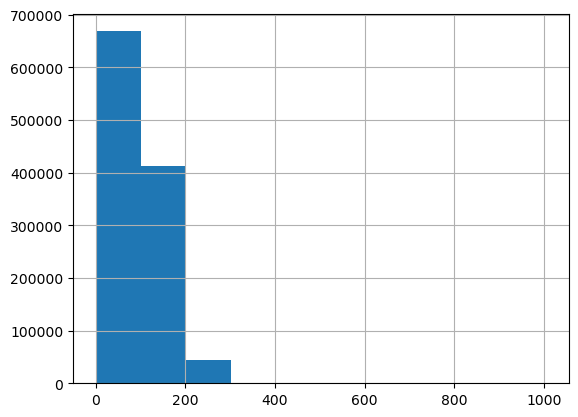

In [333]:
gm4di['선별포인트'].hist();

#### 4등급 경유차 선별포인트 샘플

In [334]:
gm4di.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수', '우선등급', '선별포인트'],
      dtype='object')

In [335]:
gm4di.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,우선등급,선별포인트
0,KMFLA18KP8C031274,92도0997,4482533000,2008,개인용,화물,대형,7.00000,13.83768,69.00000,0.00000,3,22.00000
1,KMCGK17HP9C112030,93루6527,4518010400,2009,개인용,화물,중형,5.00000,193.24818,15.00000,0.00000,3,54.00000
2,KNCSE01429K388374,87너9428,2771026522,2009,개인용,화물,소형,14.00000,151.01194,301.00000,0.00000,3,114.00000
3,KNCSE01429K388695,96구5394,2626010300,2009,개인용,화물,소형,7.00000,79.88889,184.00000,0.00000,3,66.00000
4,KNFSE0A439K387582,96구5391,3020011900,2009,개인용,화물,소형,0.00000,416.88154,280.00000,0.00000,3,173.00000


In [336]:
export4 = gm4di[[
    '차대번호', 
    '차량번호', 
    '법정동코드', 
    '연식', 
    '용도', 
    '차종', 
    '차종유형', 
    '우선등급',
    '선별포인트',
    '무부하매연측정치1', 
    '일일평균주행거리',
    '최근검사경과일', 
    '운행제한건수', 
    ]]
export4.shape

(1123576, 13)

In [337]:
export4 = export4.sort_values(['선별포인트'], ascending=False)
export4.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,우선등급,선별포인트,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수
1117,YV2RT60K8HA806702,서울88아7380,1144010400,2017,영업용,화물,대형,3,1005.00000,0.00000,3843.80180,138.00000,0.00000
1601,YV2RT40C1GA796025,경기99아2305,4150010800,2016,영업용,특수,대형,3,789.00000,0.00000,2590.35808,554.00000,0.00000
1371,YV2RT60C9HA799543,경북98사8301,4729031000,2017,영업용,특수,대형,3,728.00000,0.00000,2825.23146,58.00000,0.00000
561084,KMHJN81VP9U143755,22소6078,4311112100,2009,개인용,승용,중형,3,680.00000,0.00000,2077.65498,641.00000,0.00000
422054,KMFRA18NPBC043270,경남82아9185,4833033000,2011,영업용,화물,대형,3,614.00000,0.00000,2181.02486,259.00000,0.00000


##### [출력] 4등급 경유차 샘플

In [338]:
# # 44.0s
# export4.iloc[:].to_csv(os.path.join(df_fold, 'BD3-3_4등급_선별포인트.csv'), index=False)

In [339]:
chc_col = {
    '차대번호':'VIN', 
    '차량번호':'VHRNO', # 자동차등록번호
    '법정동코드':'STDG_CD', 
    '연식':'YRIDNW', 
    '용도':'PURPS_CD2', 
    '차종':'VHCTY_CD', # 차종코드
    '차종유형':'VHCTY_TY', 
    '우선등급':'PRIO_GRD',
    '선별포인트':'SELCT_PNT',
    '무부하매연측정치1':'NOLOD_SMO_MEVLU1', 
    '일일평균주행거리':'DY_AVRG_DRVNG_DSTNC',
    '최근검사경과일':'RCNT_INSP_ELPSD_WHL', 
    '운행제한건수':'RUN_LMT_NOCS', 
    '지원비용_백만원':'SPRT_CST',
    '배기량_리터':'DSPLVL',
    '총중량_톤':'TOTL_WGHT',
}

In [340]:
gm4d.shape

(1156238, 11)

In [341]:
gm4da.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수', '우선등급'],
      dtype='object')

In [342]:
gm4da['선별포인트'] = np.nan
gm4db['선별포인트'] = np.nan
gm4da = gm4da[['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '우선등급', '선별포인트', '무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수']]
gm4db = gm4db[['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '우선등급', '선별포인트', '무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수']]

In [343]:
total4d = pd.concat([gm4da, gm4db, export4], ignore_index=True)
total4d.shape

(1156238, 13)

In [344]:
total4d.tail()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,우선등급,선별포인트,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수
1156233,KMHNU81WBBU167050,22너4409,4513014100,2011,개인용,승용,대형,3,0.00000,0.00000,0.00252,2.00000,0.00000
1156234,KMFGA17HP8C093203,대전85사6793,3011011500,2008,영업용,화물,중형,3,0.00000,0.00000,0.00037,2.00000,0.00000
1156235,KMHJN81VP7U740613,47마5579,4413310400,2007,개인용,승용,중형,3,0.00000,0.00000,0.00138,2.00000,0.00000
1156236,KNAJE55539K648664,32구2841,4413310300,2009,개인용,승용,중형,3,0.00000,0.00000,0.00156,2.00000,0.00000
1156237,KMEHR18NP8C031149,서울98바3509,1156012700,2008,영업용,특수,대형,3,0.00000,0.00000,0.00019,2.00000,0.00000


In [345]:
total4d['우선등급'].isnull().sum()

0

In [346]:
STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT = total4d.rename(columns=chc_col)
STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT.columns

Index(['VIN', 'VHRNO', 'STDG_CD', 'YRIDNW', 'PURPS_CD2', 'VHCTY_CD',
       'VHCTY_TY', 'PRIO_GRD', 'SELCT_PNT', 'NOLOD_SMO_MEVLU1',
       'DY_AVRG_DRVNG_DSTNC', 'RCNT_INSP_ELPSD_WHL', 'RUN_LMT_NOCS'],
      dtype='object')

In [347]:
STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT.shape

(1156238, 13)

In [348]:
# # 7.6s
# # BD3-3_4등급경유차_우선차량선별
# STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT.to_csv(os.path.join(df_fold, 'STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT.csv'), index=False)

##### [출력] STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT

In [349]:
# expdf = STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT
# table_nm = 'STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT'.upper()

# # 테이블 생성
# sql = 'create table ' + table_nm + '( \n'

# for idx,column in enumerate(expdf.columns):
#     if 'float' in expdf[column].dtype.name:
#         sql += column + ' float'
#     elif 'int' in expdf[column].dtype.name:
#         sql += column + ' number'
#     else:
#         sql += column + ' varchar(255)'

#     if len(expdf.columns) - 1 != idx:
#         sql += ','
#     sql += '\n'
# sql += ')'    
# wbt.execute(sql)

# # 데이터 추가
# # 5s
# wbt.import_from_pandas(expdf, table_nm)

#### 5등급 경유 C급

In [350]:
gm5di.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수', '우선등급'],
      dtype='object')

In [351]:
gm5di['일일평균주행거리'].isnull().sum()

0

###### 조기폐차 선별포인트

In [352]:
# 선별조건선정
col = ['무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수']

In [353]:
gm5di[col].dtypes

무부하매연측정치1    float64
일일평균주행거리     float64
최근검사경과일      float64
운행제한건수       float64
dtype: object

In [354]:
gm5di[col].isnull().sum()

무부하매연측정치1    6668
일일평균주행거리        0
최근검사경과일         0
운행제한건수          0
dtype: int64

In [355]:
# nan 값 0으로 채우기
gm5di[col] = gm5di[col].fillna(0)
gm5di[col].isnull().sum()

무부하매연측정치1    0
일일평균주행거리     0
최근검사경과일      0
운행제한건수       0
dtype: int64

In [356]:
gm5di_corr = gm5di[col].corr()
gm5di_corr

,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수
무부하매연측정치1,1.00000,-0.01612,0.01793,-0.02871
일일평균주행거리,-0.01612,1.00000,0.00595,0.01475
최근검사경과일,0.01793,0.00595,1.00000,0.04266
운행제한건수,-0.02871,0.01475,0.04266,1.00000


###### [출력] 5등급 경유차 선별조건 상관계수

In [357]:
t5 = pd.concat([gm5di_corr, gm5di_corr.sum()], axis=1)
t5 = t5.rename(columns={0:'합계'})
t5 = t5.reset_index()
t5

,index,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,합계
0,무부하매연측정치1,1.00000,-0.01612,0.01793,-0.02871,0.97309
1,일일평균주행거리,-0.01612,1.00000,0.00595,0.01475,1.00458
2,최근검사경과일,0.01793,0.00595,1.00000,0.04266,1.06654
3,운행제한건수,-0.02871,0.01475,0.04266,1.00000,1.02869


In [358]:
t5.columns

Index(['index', '무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수', '합계'], dtype='object')

In [359]:
chc_col = {
    'index':'LIST', 
    '무부하매연측정치1':'NOLOD_SMO_MEVLU1', 
    '일일평균주행거리':'DY_AVRG_DRVNG_DSTNC', 
    '최근검사경과일':'RCNT_INSP_ELPSD_WHL', 
    '운행제한건수':'RUN_LMT_NOCS', 
    '합계':'TOT_CRRLTN_CFFCNT',
}

In [360]:
STD_BD_GRD5_DS_CRRLTN_CFFCNT = t5.rename(columns=chc_col)
STD_BD_GRD5_DS_CRRLTN_CFFCNT

,LIST,NOLOD_SMO_MEVLU1,DY_AVRG_DRVNG_DSTNC,RCNT_INSP_ELPSD_WHL,RUN_LMT_NOCS,TOT_CRRLTN_CFFCNT
0,무부하매연측정치1,1.00000,-0.01612,0.01793,-0.02871,0.97309
1,일일평균주행거리,-0.01612,1.00000,0.00595,0.01475,1.00458
2,최근검사경과일,0.01793,0.00595,1.00000,0.04266,1.06654
3,운행제한건수,-0.02871,0.01475,0.04266,1.00000,1.02869


###### [출력] 5등급경유차 상관계수

In [361]:
# # BD3-3_5등급경유차_상관계수
# STD_BD_GRD5_DS_CRRLTN_CFFCNT.to_csv(os.path.join(df_fold, 'STD_BD_GRD5_DS_CRRLTN_CFFCNT.csv'), index=False)

##### [출력] STD_BD_GRD5_DS_CRRLTN_CFFCNT

In [362]:
# expdf = STD_BD_GRD5_DS_CRRLTN_CFFCNT
# table_nm = 'STD_BD_GRD5_DS_CRRLTN_CFFCNT'.upper()

# # 테이블 생성
# sql = 'create table ' + table_nm + '( \n'

# for idx,column in enumerate(expdf.columns):
#     if 'float' in expdf[column].dtype.name:
#         sql += column + ' float'
#     elif 'int' in expdf[column].dtype.name:
#         sql += column + ' number'
#     else:
#         sql += column + ' varchar(255)'

#     if len(expdf.columns) - 1 != idx:
#         sql += ','
#     sql += '\n'
# sql += ')'    
# wbt.execute(sql)

# # 데이터 추가
# # 5s
# wbt.import_from_pandas(expdf, table_nm)

In [363]:
gm5di_corr.sum()[col]

무부하매연측정치1   0.97309
일일평균주행거리    1.00458
최근검사경과일     1.06654
운행제한건수      1.02869
dtype: float64

In [364]:
c1, c2, c3, c4 = gm5di_corr.sum()[col]
sc1 = c1 + c2 + c3 + c4
w1, w2, w3, w4 = c1/sc1, c2/sc1, c3/sc1, c4/sc1
w1, w2, w3, w4

(0.23891920388322851,
 0.24664898093516704,
 0.2618618426231776,
 0.2525699725584269)

In [365]:
gm5di['선별포인트'] = np.round(w1 * gm5di['무부하매연측정치1'] + w2 * gm5di['일일평균주행거리'] + w3 * gm5di['최근검사경과일'] + w4 * gm5di['운행제한건수'], 0)
gm5di['선별포인트'].isnull().sum()

0

In [366]:
gm5di['선별포인트'].describe()

count   707939.00000
mean       111.31923
std         78.21799
min          1.00000
25%         49.00000
50%         97.00000
75%        162.00000
max      25249.00000
Name: 선별포인트, dtype: float64

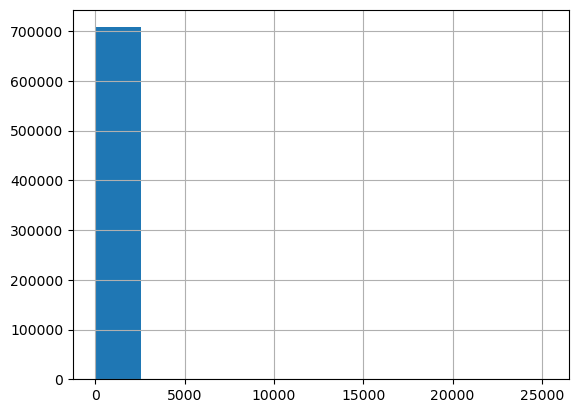

In [367]:
gm5di['선별포인트'].hist();

#### 5등급 경유차 선별포인트 샘플

In [368]:
gm5di.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수', '우선등급', '선별포인트'],
      dtype='object')

In [369]:
gm5di['저감장치'].value_counts()

저감장치
유    234877
Name: count, dtype: int64

In [370]:
gm5di.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,저감장치,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,우선등급,선별포인트
0,KL3C3AHF27K000068,84라1558,4372033032,2007,개인용,화물,대형,NaN,0.00000,559.55062,15.00000,0.00000,3,142.00000
1,KMCYSS7JP7U084697,99도4857,4423038028,2007,개인용,특수,중형,NaN,9.00000,31.28655,308.00000,0.00000,3,91.00000
2,KMFZCD7HP6U177736,88더0229,4413310800,2006,개인용,화물,중형,유,13.00000,269.69122,331.00000,0.00000,3,156.00000
3,KL3C3AHF27K000062,83노0270,4792025023,2007,개인용,화물,대형,NaN,8.00000,332.99284,141.00000,0.00000,3,121.00000
4,KMCGK17PP7C072513,90로1655,3171034000,2007,개인용,화물,중형,NaN,3.00000,28.16736,7.00000,1.00000,3,10.00000


In [371]:
export5 = gm5di[[
    '차대번호', 
    '차량번호', 
    '법정동코드', 
    '연식', 
    '용도', 
    '차종', 
    '차종유형', 
    '저감장치',
    '우선등급', 
    '선별포인트',
    '무부하매연측정치1', 
    '일일평균주행거리',
    '최근검사경과일', 
    '운행제한건수', 
    ]]
export5.shape

(707939, 14)

In [372]:
export5 = export5.sort_values(['선별포인트'], ascending=False)
export5.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,저감장치,우선등급,선별포인트,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수
742870,KMYKP17CPYU414954,05루9403,2871025022,2000,개인용,승용,중형,NaN,3,25249.00000,21.00000,102073.36301,254.00000,5.00000
70598,KMFLA18EP7C022656,충남94바1614,4427010100,2007,영업용,화물,대형,유,3,570.00000,5.00000,1185.56230,1056.00000,0.00000
747719,KN3HDP3361K740793,86두9741,4215033024,2001,개인용,화물,중형,NaN,3,517.00000,999.90000,50.91004,1014.00000,0.00000
425723,KMHJP81VP4U046363,03어2631,4275032526,2004,개인용,승용,중형,NaN,3,508.00000,999.90000,57.65125,972.00000,0.00000
62588,KMFGA17PP7C067736,서울85바5177,1150010500,2007,영업용,화물,중형,NaN,3,499.00000,12.00000,1629.00421,359.00000,0.00000


##### [출력] 5등급 경유차 샘플

In [373]:
# # 
# export5.iloc[:].to_csv(os.path.join(df_fold, 'BD3-3_5등급_선별포인트.csv'), index=False)

In [374]:
chc_col = {
    '차대번호':'VIN', 
    '차량번호':'VHRNO', # 자동차등록번호
    '법정동코드':'STDG_CD', 
    '연식':'YRIDNW', # 연식
    '용도':'PURPS_CD2', 
    '차종':'VHCTY_CD', # 차종코드
    '차종유형':'VHCTY_TY', 
    '저감장치':'RDCDVC',
    '우선등급':'PRIO_GRD',
    '선별포인트':'SELCT_PNT',
    '무부하매연측정치1':'NOLOD_SMO_MEVLU1', 
    '일일평균주행거리':'DY_AVRG_DRVNG_DSTNC',
    '최근검사경과일':'RCNT_INSP_ELPSD_WHL', 
    '운행제한건수':'RUN_LMT_NOCS', 
    '지원비용_조기폐차_백만원':'SPRT_CST_ELPDSRC',
    '지원비용_DPF_백만원':'SPRT_CST_DPF', 
    '배기량_리터':'DSPLVL',
    '총중량_톤':'TOTL_WGHT',
}

In [375]:
gm5d.shape

(1106013, 12)

In [376]:
gm5da['선별포인트'] = np.nan
gm5db['선별포인트'] = np.nan
gm5da = gm5da[['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '우선등급', '선별포인트', '무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수']]
gm5db = gm5db[['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '우선등급', '선별포인트', '무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수']]

In [377]:
total5d = pd.concat([gm5da, gm5db, export5], ignore_index=True)
total5d.shape

(1106013, 14)

In [378]:
total5d.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,저감장치,우선등급,선별포인트,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수
0,KNAJC52182A082279,04보1352,4122025041,2002,개인용,승용,대형,NaN,1,NaN,8.00000,-1394.53097,1617.00000,11.00000
1,KNAJC52136A566442,14더6163,4122025041,2006,개인용,승용,대형,NaN,1,NaN,10.00000,-364.14316,1980.00000,2.00000
2,KPBFA2AF15P147164,58주3416,2720010300,2005,개인용,승용,대형,NaN,1,NaN,14.00000,-221.83703,2476.00000,1.00000
3,KNAJE55135K097976,27루3463,4125010600,2005,개인용,승용,중형,NaN,1,NaN,4.00000,-256.62054,2249.00000,2.00000
4,KNAJC52124A297066,54마8957,4122025041,2004,개인용,승용,대형,NaN,1,NaN,7.00000,-515.42508,1908.00000,5.00000


In [379]:
total5d['우선등급'].isnull().sum()

0

In [380]:
STD_BD_GRD5_LEM_PRIO_ORD_SELCT_CURSTT = total5d.rename(columns=chc_col)
STD_BD_GRD5_LEM_PRIO_ORD_SELCT_CURSTT.columns

Index(['VIN', 'VHRNO', 'STDG_CD', 'YRIDNW', 'PURPS_CD2', 'VHCTY_CD',
       'VHCTY_TY', 'RDCDVC', 'PRIO_GRD', 'SELCT_PNT', 'NOLOD_SMO_MEVLU1',
       'DY_AVRG_DRVNG_DSTNC', 'RCNT_INSP_ELPSD_WHL', 'RUN_LMT_NOCS'],
      dtype='object')

In [381]:
STD_BD_GRD5_LEM_PRIO_ORD_SELCT_CURSTT.shape

(1106013, 14)

In [ ]:
# # 5.5s
# # BD3-3_5등급경유차_우선차량선별
# STD_BD_GRD5_LEM_PRIO_ORD_SELCT_CURSTT.to_csv(os.path.join(df_fold, 'STD_BD_GRD5_LEM_PRIO_ORD_SELCT_CURSTT.csv'), index=False)

##### [출력] STD_BD_GRD5_LEM_PRIO_ORD_SELCT_CURSTT

In [ ]:
# expdf = STD_BD_GRD5_LEM_PRIO_ORD_SELCT_CURSTT
# table_nm = 'STD_BD_GRD5_LEM_PRIO_ORD_SELCT_CURSTT'.upper()

# # 테이블 생성
# sql = 'create table ' + table_nm + '( \n'

# for idx,column in enumerate(expdf.columns):
#     if 'float' in expdf[column].dtype.name:
#         sql += column + ' float'
#     elif 'int' in expdf[column].dtype.name:
#         sql += column + ' number'
#     else:
#         sql += column + ' varchar(255)'

#     if len(expdf.columns) - 1 != idx:
#         sql += ','
#     sql += '\n'
# sql += ')'    
# wbt.execute(sql)

# # 데이터 추가
# # 5s
# wbt.import_from_pandas(expdf, table_nm)

# code end